# **Follow Step(1)**

## **Adding 2 models**
________

**Motivation for model selection :**
</br> After investigating well the nature of the data, we observed that we should crucially target classification models that fullfill two main needs :-
> 1) Dealing with Imbalanced data.</br>
> 2) Fairness for senstive attributes.

</br> Accordingly we decided to focus on bagging or boosting algorithms, and we choosed boosting , through which we will try both GBM and AdaBoost.

______

### **1) Before Preprocessing**

> ### **1.1) GBM**

In [ ]:
from FraudDetector import Bank_Account_Fraud_Detection

_______
_______

In [ ]:
# Load Base.csv
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Base')

the following encodeing is a preprocessing step ==> related to step(2), but it's essential here even if other preprocessing will be not included

In [ ]:
fraud_detector.preprocess(option='baseline', fet_eng=False)

## 1.1.1) Without Tunning Trail

In [ ]:
# gradient boosting machine
predictions = fraud_detector.train_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9897,0.8905,0.0298,0.4857,0.0561,0.0550,0.1184
1,0.9898,0.8874,0.0350,0.5263,0.0657,0.0645,0.1339
2,0.9899,0.8930,0.0298,0.6296,0.0570,0.0561,0.1355
3,0.9896,0.8926,0.0351,0.4348,0.0649,0.0635,0.1213
4,0.9898,0.8952,0.0246,0.5833,0.0471,0.0463,0.1182
5,0.9898,0.8920,0.0281,0.5333,0.0533,0.0524,0.1207
6,0.9900,0.8825,0.0333,0.7308,0.0637,0.0628,0.1546
7,0.9897,0.8779,0.0333,0.4872,0.0623,0.0611,0.1253
8,0.9897,0.8905,0.0245,0.4667,0.0466,0.0456,0.1052


#### Visualization for model performance on training data

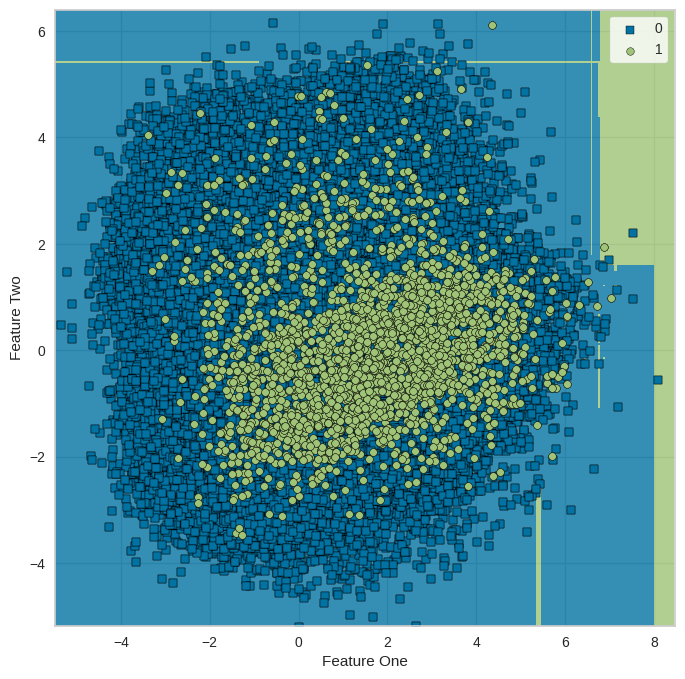

In [ ]:
fraud_detector.plot_GBM('boundary')

#### Visualization for model performance on validation data

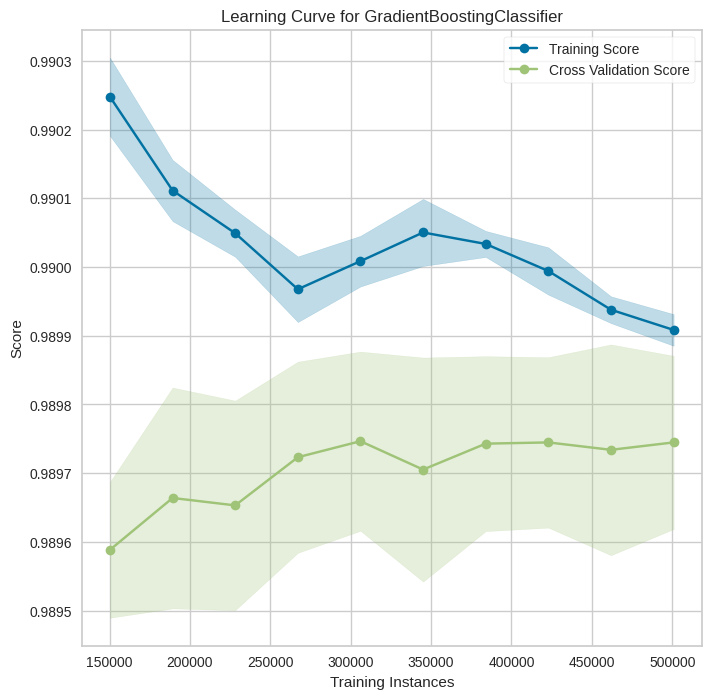

In [ ]:
fraud_detector.plot_GBM('learning')

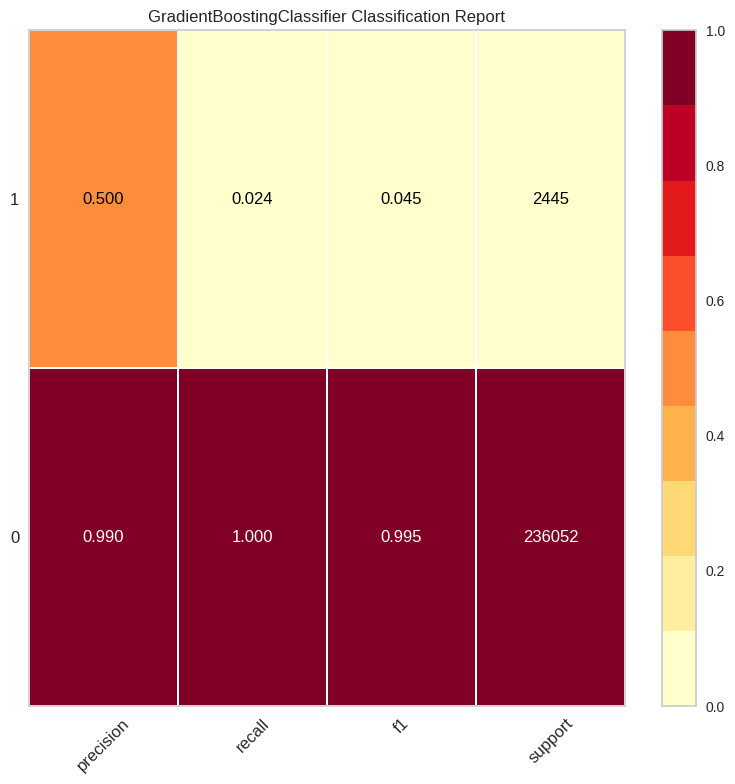

In [ ]:
fraud_detector.plot_GBM('class_report')

#### Model evalution on test data

In [ ]:
fraud_detector.evaluate_GBM()

* even having a good accuracy we can not depend on it

Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

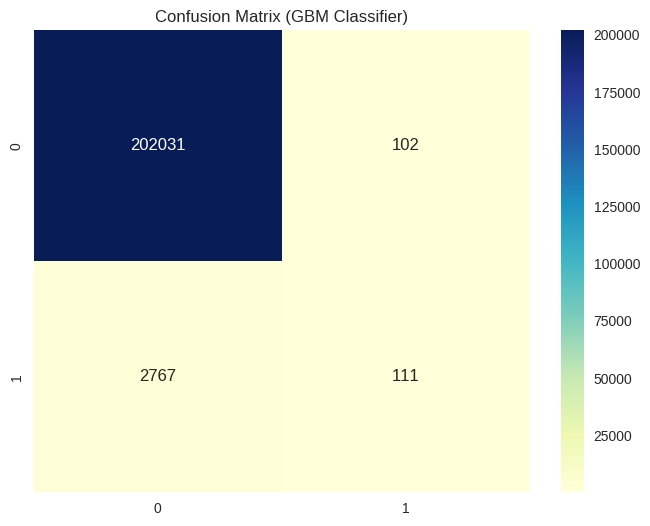

In [ ]:
fraud_detector.evaluate_GBM()

* showes a bad results concerning the True Negative which didn't exceed even 1% of the samples

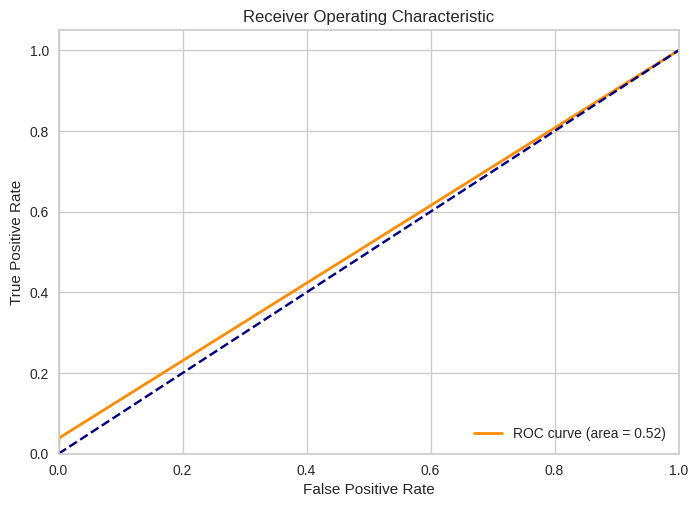

AUC: 0.5190


In [ ]:
fraud_detector.evaluate(predictions, 'GBM')

* Bad AUC

## 1.1.2)With Hyperparameter Tunning

The following will be a random tunning trail, using the pycaret lib.
> <font color="red"> it's worth noting here that Grid Search resulted in running for more than 2 days which was not feasible at all , while using university server for limited days, accordingly we prefered using the randomized search to be faster.  </font>

In [ ]:
#tune_model uses a randomized search to explore the hyperparameter space
predictions = fraud_detector.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9896,0.8950,0.0315,0.4390,0.0588,0.0575,0.1155
1,0.9898,0.8913,0.0350,0.5405,0.0658,0.0646,0.1357
2,0.9900,0.8959,0.0333,0.7037,0.0637,0.0628,0.1517
3,0.9896,0.8934,0.0316,0.3913,0.0584,0.0570,0.1089
4,0.9899,0.8983,0.0333,0.6129,0.0632,0.0622,0.1413
5,0.9898,0.8962,0.0333,0.5758,0.0630,0.0620,0.1368
6,0.9898,0.8852,0.0263,0.5357,0.0501,0.0492,0.1170
7,0.9896,0.8814,0.0298,0.4250,0.0556,0.0544,0.1104
8,0.9898,0.8943,0.0280,0.5517,0.0533,0.0524,0.1227


Fitting 10 folds for each of 10 candidates, totalling 100 fits


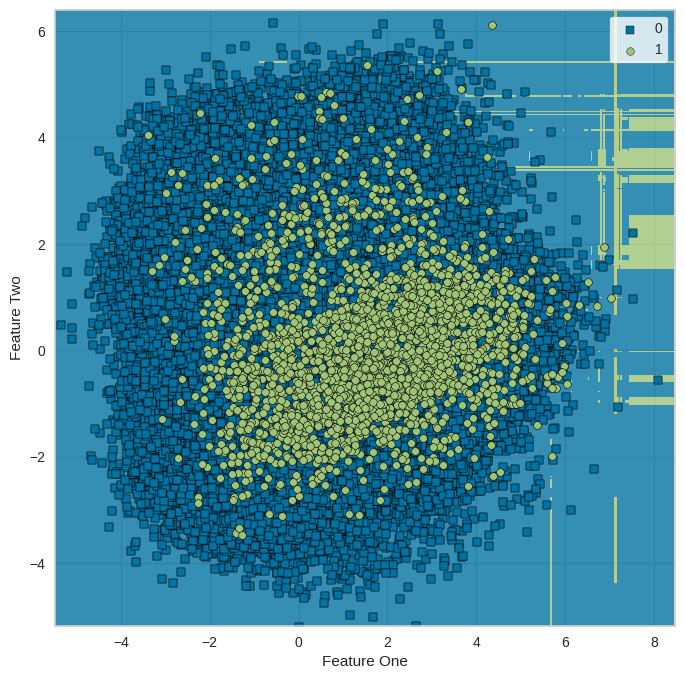

In [ ]:
fraud_detector.plot_GBM('boundary')

* **Observations:** We can see here that there is no boundry line could be drawn , so we are expecting low auc

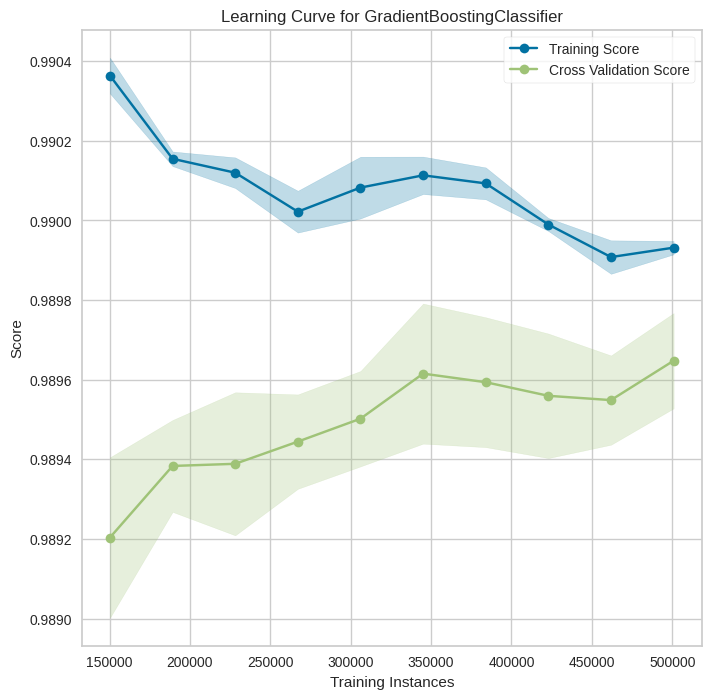

In [ ]:
fraud_detector.plot_GBM('learning')

* **Observations:** the learning curve show fluctuating state of the model while learning

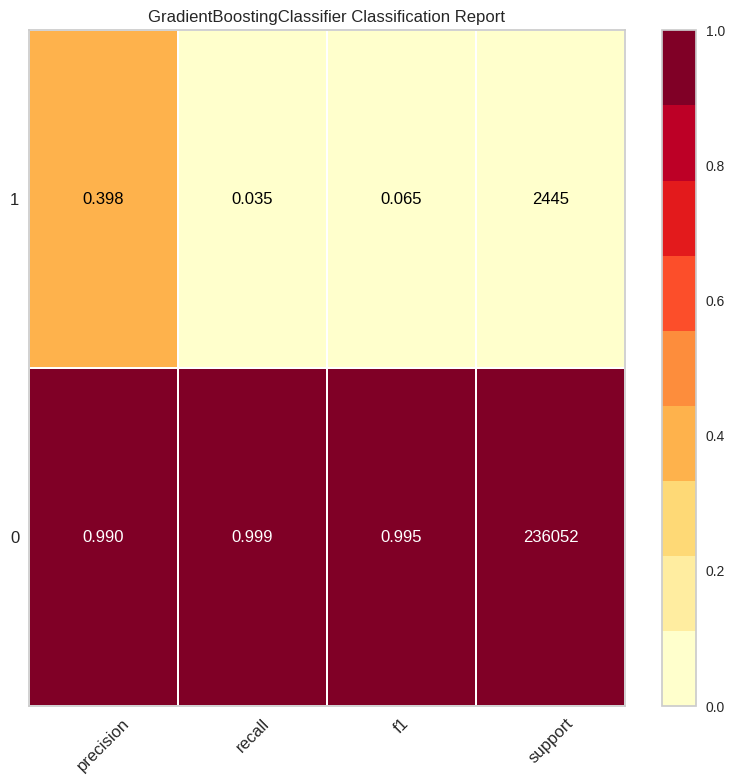

In [ ]:
fraud_detector.plot_GBM('class_report')

* even having a good accuracy we can not depend on it

#### Model evalution on test data after hyper tunning

Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

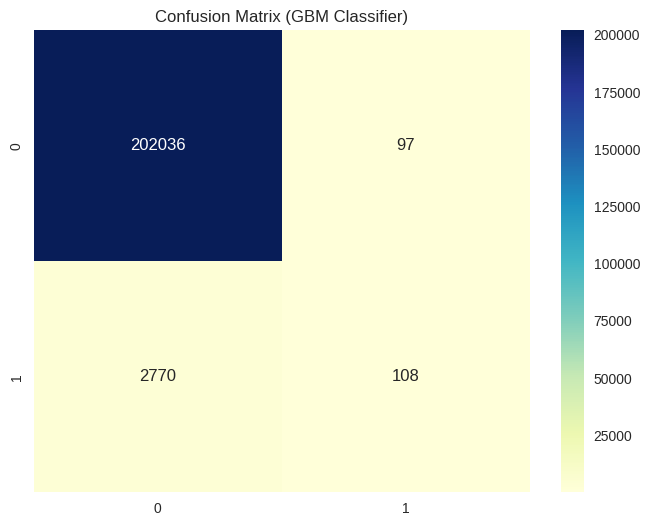

In [ ]:
fraud_detector.evaluate_GBM()

* showes a bad results concerning the True Negative

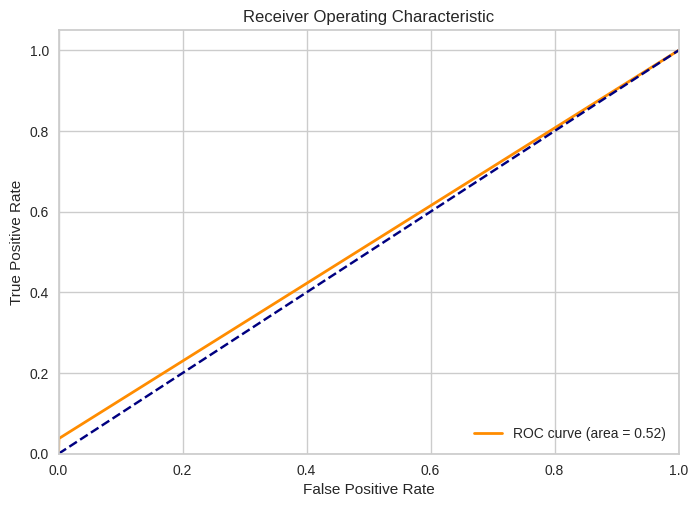

AUC: 0.5185


In [ ]:
fraud_detector.evaluate(predictions, 'Fine Tuned GBM')

#####  **Observations:** It's importamt here to mention that AUC is sensitive to imbalanced datasets, so it's value here is so misleading, so I'm hoping that i could enhance the result after appling the preprocessing

In [ ]:
test_df =pd.concat([X_test,y_test],axis=1)

In [ ]:
evaluate(pred)

TPR:  3.75% 
FPR:  0.05% 
Threshold:  1


#### Model Fairness

In [ ]:
predictive_equality, disparities_df = get_fairness_metrics(y_test, pred, groups, FIXED_FPR)
print("Predictive Equality: ", to_pct(predictive_equality))

Predictive Equality:  10.33%


> ### **1.2) Ada Boost**

 **Motivation:** Our selection for AdaBoost was because it assigns weights to data points and adjusts them at each iteration to focus more on misclassified samples. It trains weak learners sequentially, and each new learner is designed to correct the errors of its predecessor.

#### 1.2.1) Without Tunning

In [ ]:
# Create an AdaBoost model
predictions = fraud_detector.train_GBM('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9898,0.8857,0.0438,0.5102,0.0806,0.0792,0.1473
1,0.9898,0.8932,0.0560,0.5424,0.1016,0.0999,0.1720
2,0.9898,0.8961,0.0368,0.5250,0.0687,0.0675,0.1370
3,0.9896,0.8794,0.0473,0.4286,0.0852,0.0833,0.1397
4,0.9899,0.8924,0.0771,0.5500,0.1352,0.1330,0.2032
5,0.9896,0.8835,0.0438,0.4167,0.0792,0.0774,0.1325
6,0.9898,0.8953,0.0439,0.5319,0.0810,0.0796,0.1506
7,0.9897,0.8953,0.0526,0.4839,0.0949,0.0931,0.1571
8,0.9896,0.8859,0.0386,0.4074,0.0705,0.0689,0.1229


##### **Evaluate the model on Test Set**

Text(0.5, 1.0, 'Confusion Matrix (AdaBoost Classifier)')

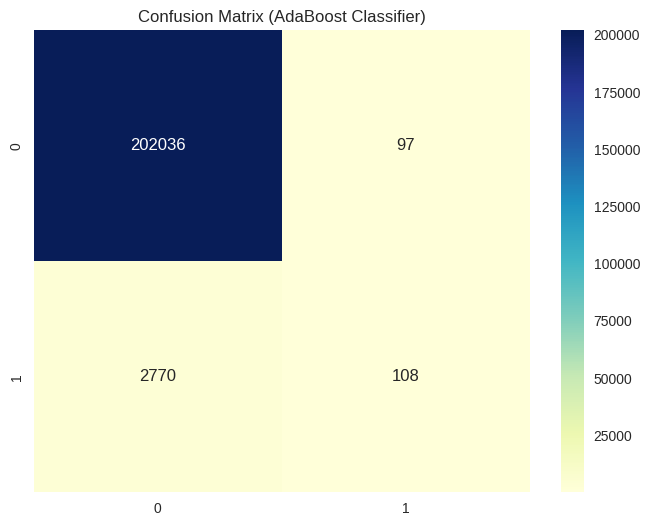

In [ ]:
fraud_detector.evaluate_GBM()

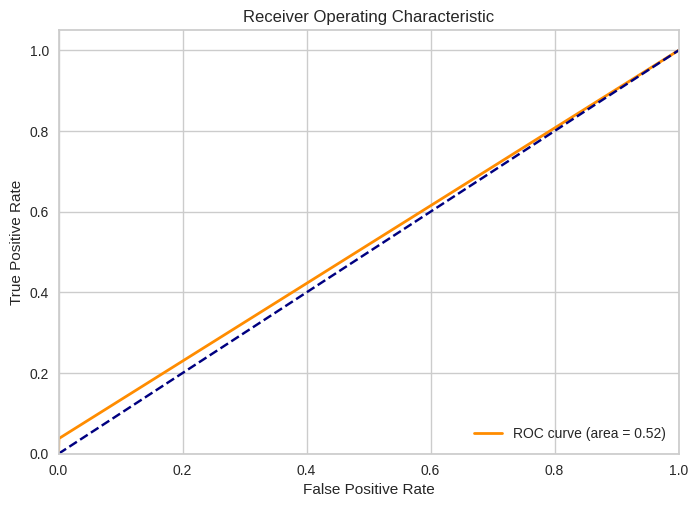

AUC: 0.5185


In [ ]:
fraud_detector.evaluate(predictions, 'Adaboost')

In [ ]:
test_df =pd.concat([X_test,y_test],axis=1)

In [ ]:
evaluate(pred)

TPR:  3.75% 
FPR:  0.05% 
Threshold:  1


#### Model Fairness

In [ ]:
predictive_equality, disparities_df = get_fairness_metrics(y_test, pred, groups, FIXED_FPR)
print("Predictive Equality: ", to_pct(predictive_equality))

Predictive Equality:  10.33%


#### 1.2.2)With Hyperparameter Tunning

In [ ]:
#tune_model uses a randomized search to explore the hyperparameter space
predictions = fraud_detector.tune_GBM('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9899,0.8833,0.0175,0.8333,0.0343,0.0339,0.1199
1,0.9898,0.8944,0.0123,0.7778,0.0241,0.0238,0.0969
2,0.9898,0.8947,0.0088,0.8333,0.0173,0.0171,0.0848
3,0.9897,0.8820,0.0088,0.3571,0.0171,0.0166,0.0546
4,0.9898,0.8934,0.0123,0.7000,0.0241,0.0238,0.0918
5,0.9897,0.8848,0.0140,0.5000,0.0273,0.0267,0.0824
6,0.9898,0.8939,0.0035,0.6667,0.0070,0.0069,0.0479
7,0.9898,0.8936,0.0070,0.6667,0.0139,0.0137,0.0677
8,0.9898,0.8849,0.0088,1.0000,0.0174,0.0172,0.0932


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


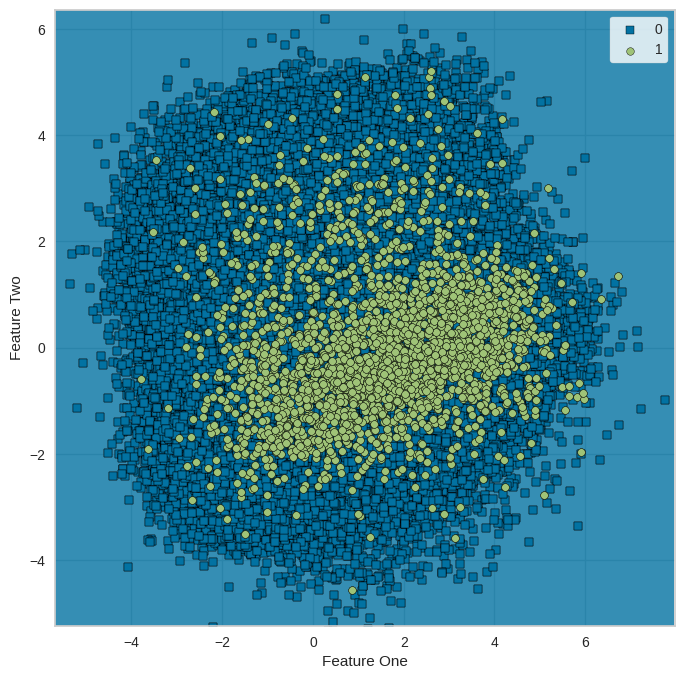

In [ ]:
fraud_detector.plot_GBM('boundary')

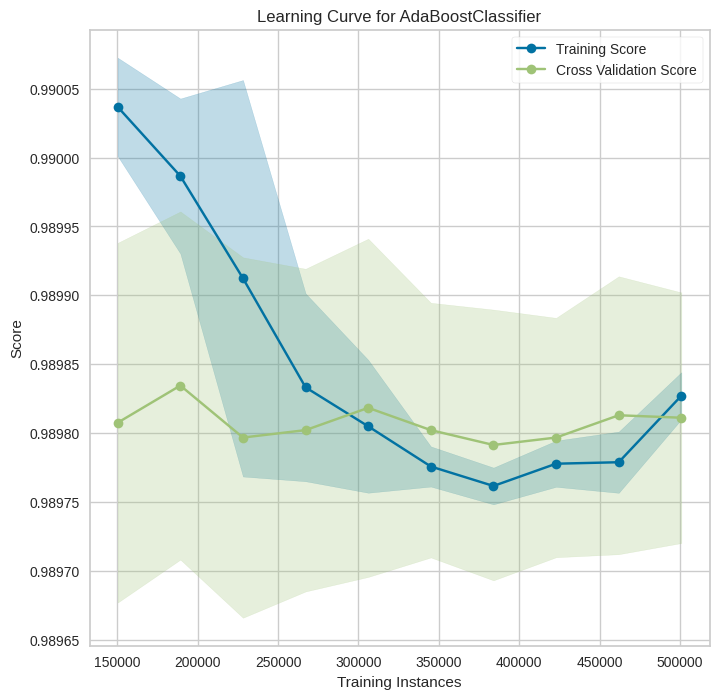

In [ ]:
fraud_detector.plot_GBM('learning')

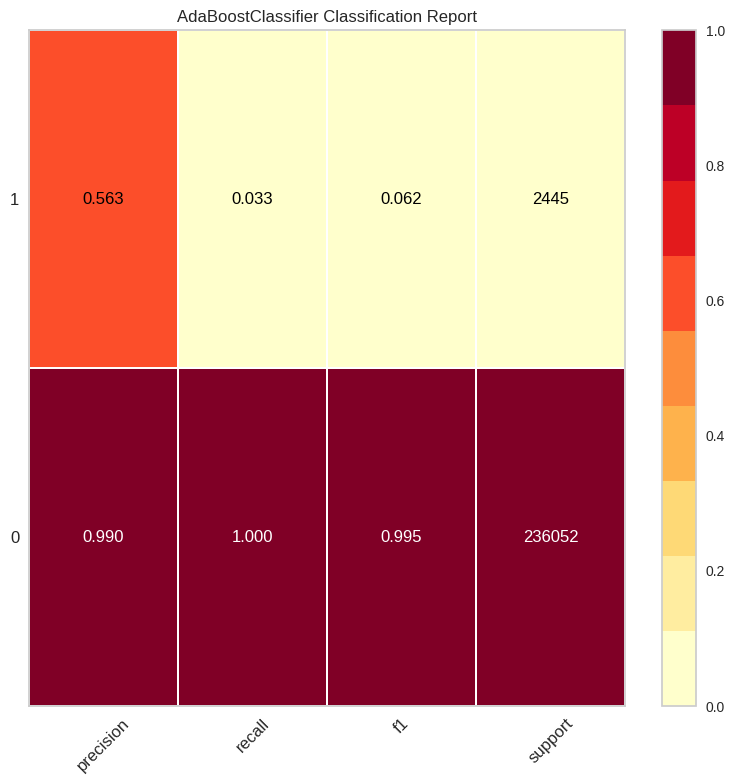

In [ ]:
fraud_detector.plot_GBM('class_report')

#### Evaluation of the tunned

Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

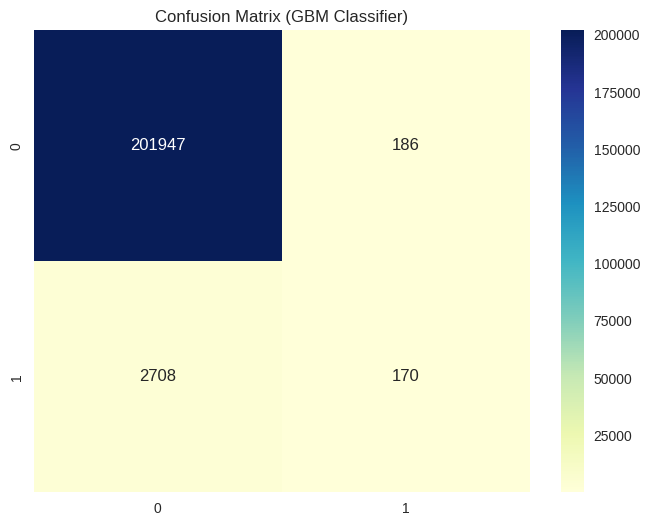

In [ ]:
fraud_detector.evaluate_GBM()

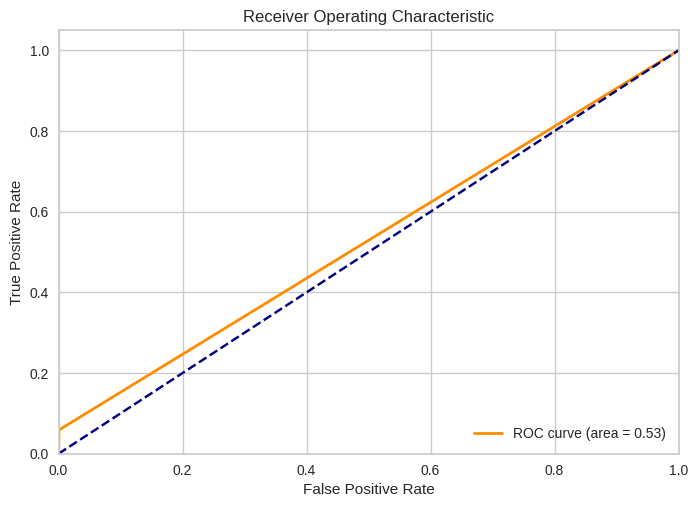

AUC: 0.5291


In [ ]:
fraud_detector.evaluate(predictions, 'Fine Tuned Adaboost')

**Observation :** There is Discrepancy in AUC values between hyperparameter tuning and final evaluation

**Possible reasons for the issue:**
* If the dataset is imbalanced, the AUC value can be sensitive to the class distribution in the training and testing data, where different data splits can result in varying AUC values => and this is so obvious in our case
* Model Selection Bias ===> but according to the previous results concerning the fairness evaluation results , this assumption will be rejected as the predictive equality ratio is already good enough

Accordingly preprocessing from step two should be applied first

Ensuring fairness in machine learning models is essential to avoid biased decisions and potential discrimination against certain groups,specifically focusing on the FPR (False Positive Rate) parity (predictive equality)

* **Observations:** the score is not better than before and this ensures that the problem is concerning the imbalance problem itself, even if we selected the best model with best hyperparameters, we can't get good results without preprocessing epecially handeling the imbalance problem.

____________

_____

# **Trail (2) for preprocessing**

In [ ]:
# Data Basic Statistics
fraud_detector.EDA('info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
fraud_detector.EDA('description')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


<Axes: >

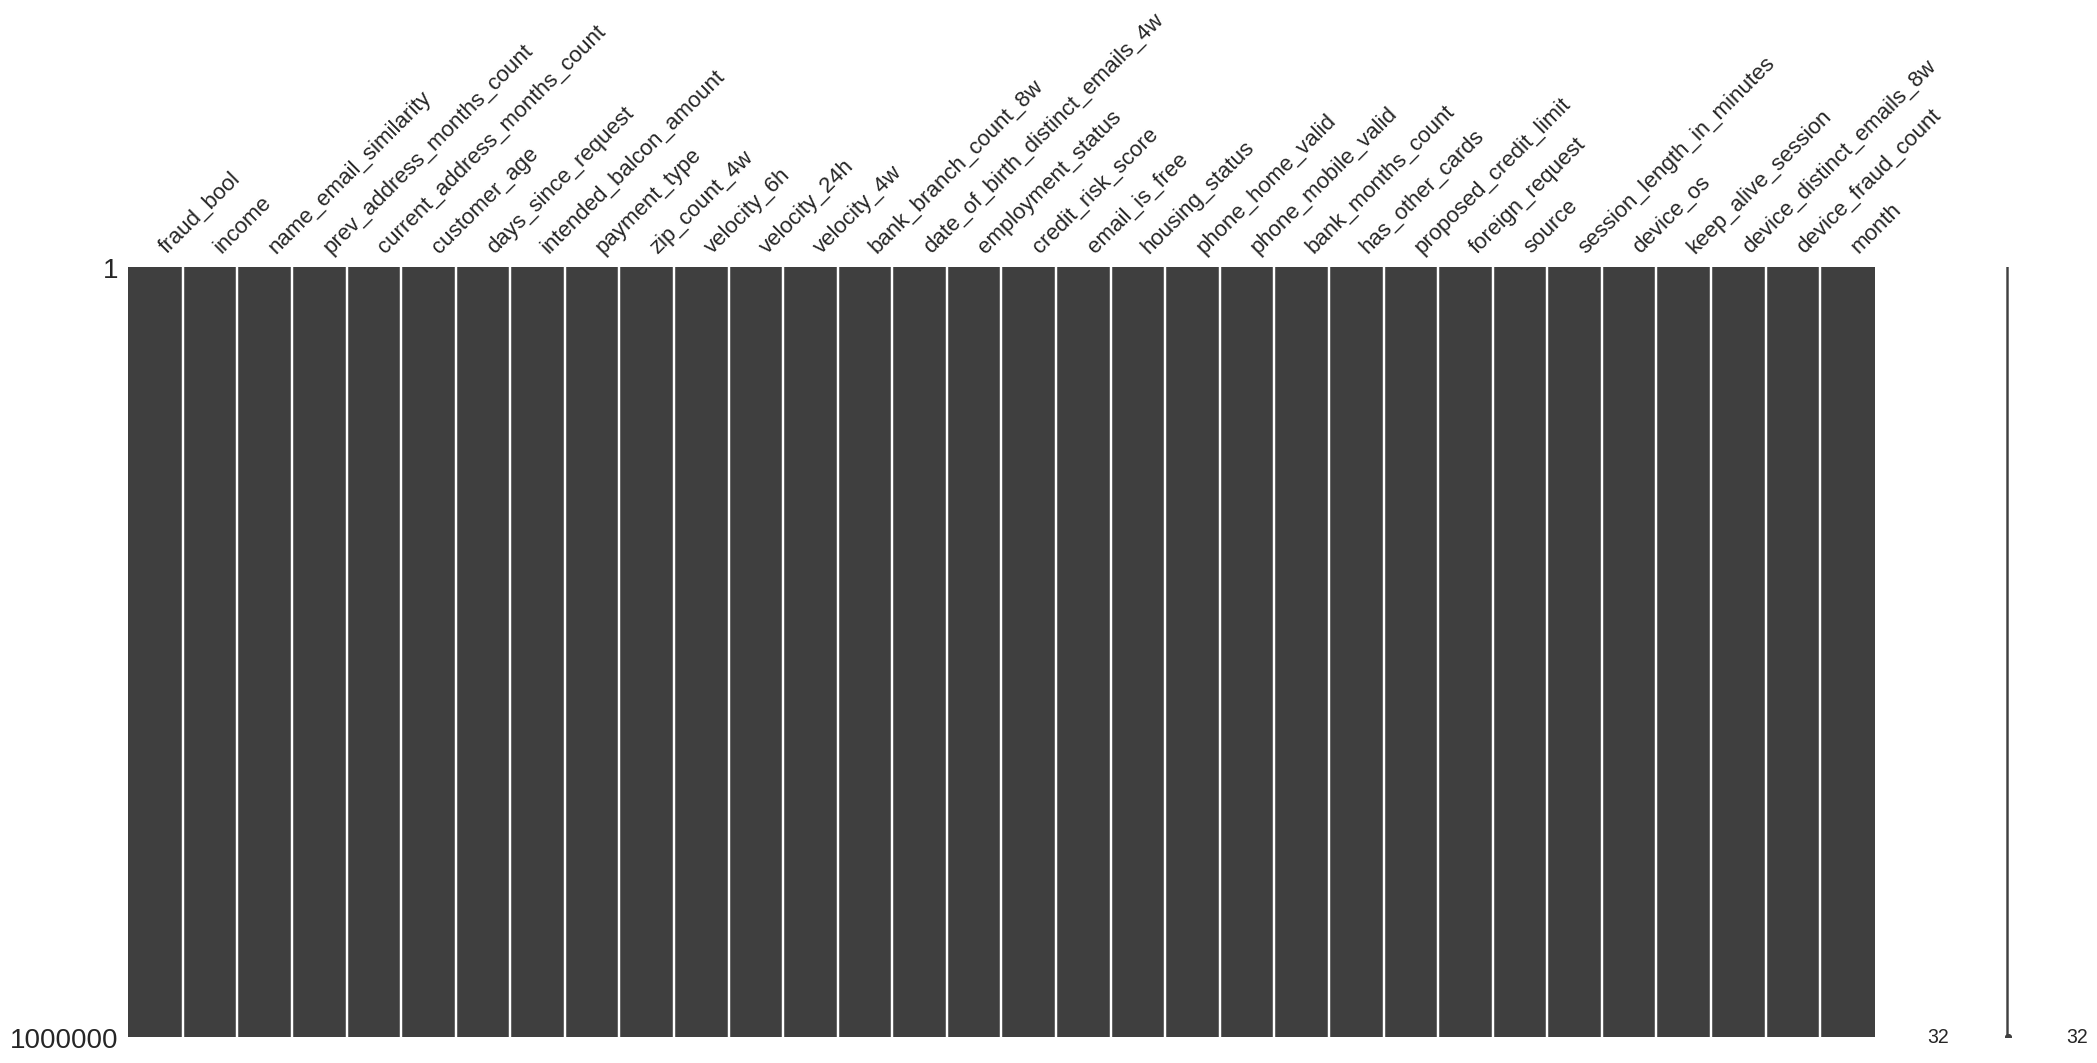

In [ ]:
# Check Missing Values
fraud_detector.EDA('missingno')

In [ ]:
# checking the data balance
fraud_detector.EDA('frauds')

0    988971
1     11029
Name: fraud_bool, dtype: int64

In [ ]:
 fraud_detector.preprocess(option='option2', fet_eng=False)

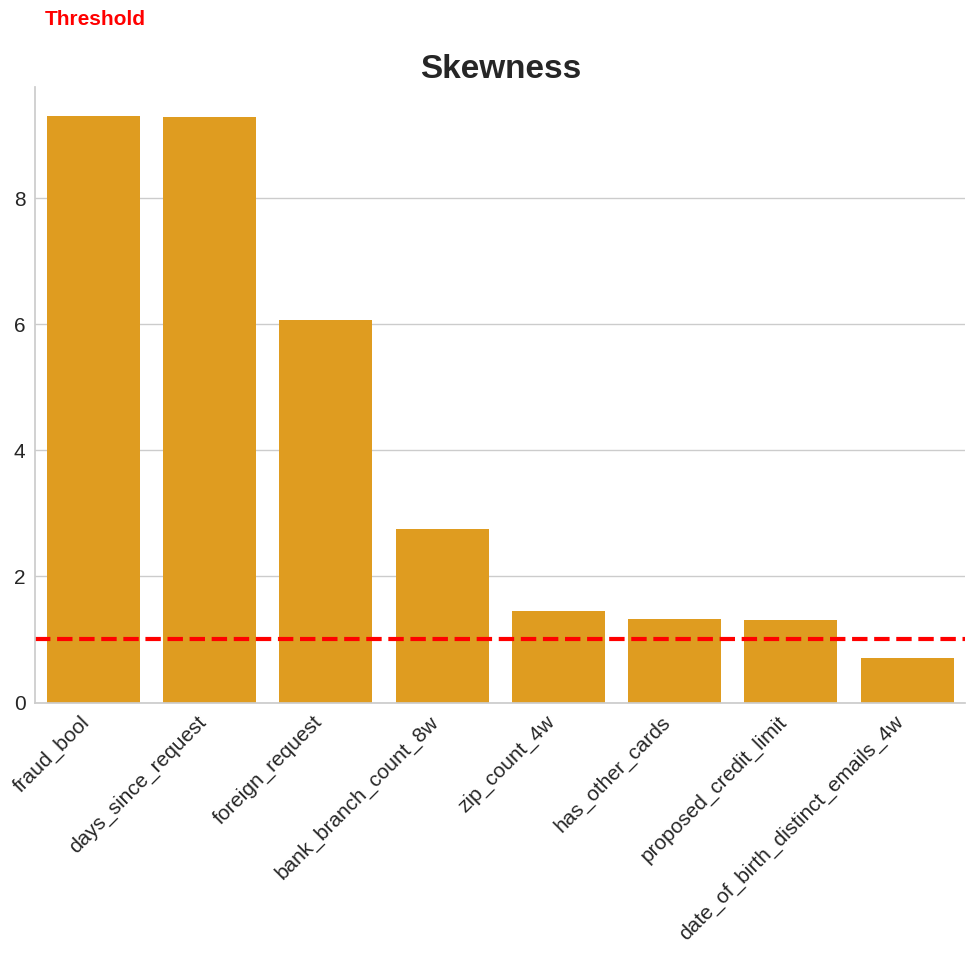

In [ ]:
fraud_detector.EDA('skewness')

Variables with a positive skewness may necessitate unique handling or log transformation to rectify the asymmetry in their distributions before utilizing specific statistical methods that assume normality.

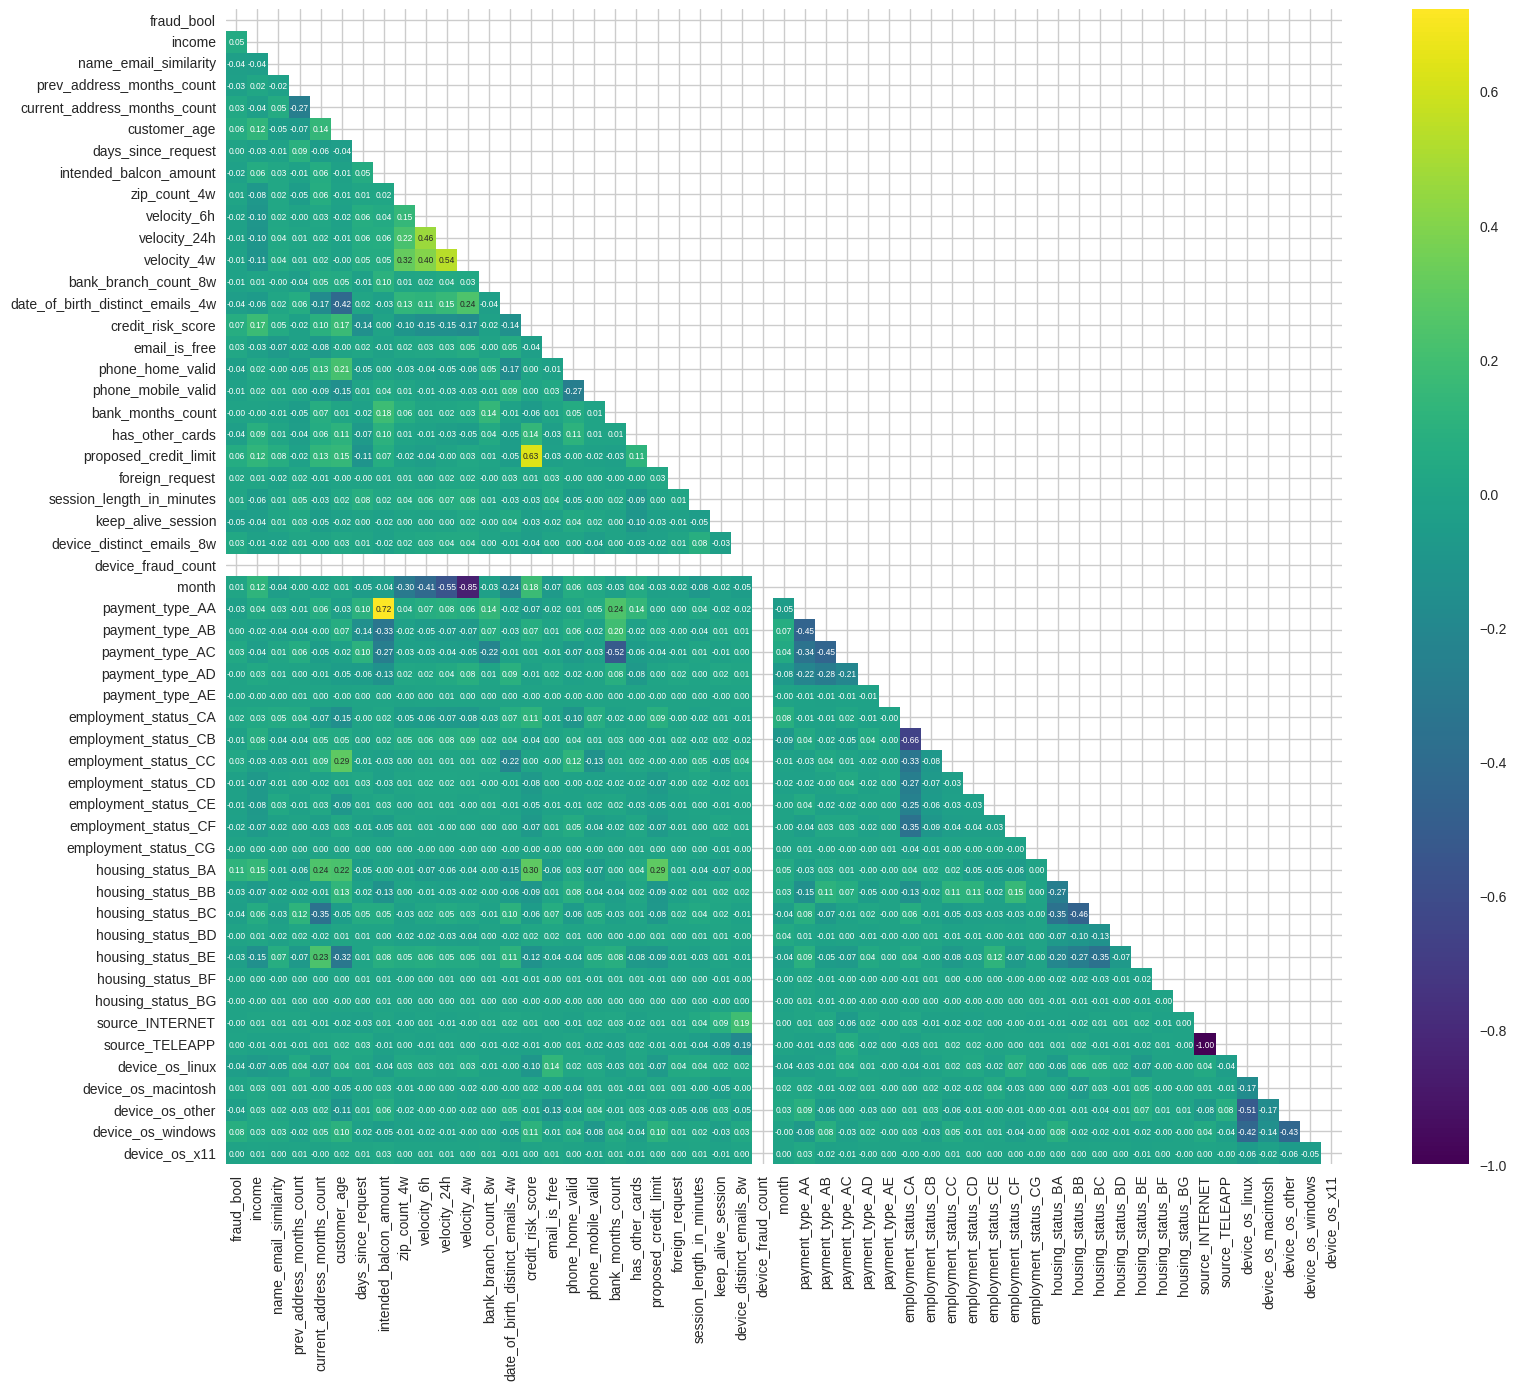

In [ ]:
# correlation check
fraud_detector.EDA('correlation')

In [ ]:
fraud_detector.handle_imbalance('SMOTE')

____________

____________

### **2) After Preprocessing**

> ### **2.1) GBM**

>> #### 2.1.1) Without Tunning

In [ ]:
prediction = fraud_detector.train_GBM() # gradient boosting machine

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9779,0.9966,0.9757,0.9800,0.9778,0.9557,0.9557
1,0.9780,0.9966,0.9766,0.9793,0.9780,0.9560,0.9560
2,0.9774,0.9968,0.9756,0.9792,0.9774,0.9549,0.9549
3,0.9794,0.9971,0.9775,0.9811,0.9793,0.9588,0.9588
4,0.9779,0.9969,0.9766,0.9792,0.9779,0.9559,0.9559
5,0.9783,0.9971,0.9772,0.9794,0.9783,0.9567,0.9567
6,0.9767,0.9964,0.9741,0.9792,0.9767,0.9535,0.9535
7,0.9770,0.9965,0.9743,0.9796,0.9769,0.9540,0.9540
8,0.9761,0.9965,0.9730,0.9790,0.9760,0.9522,0.9522


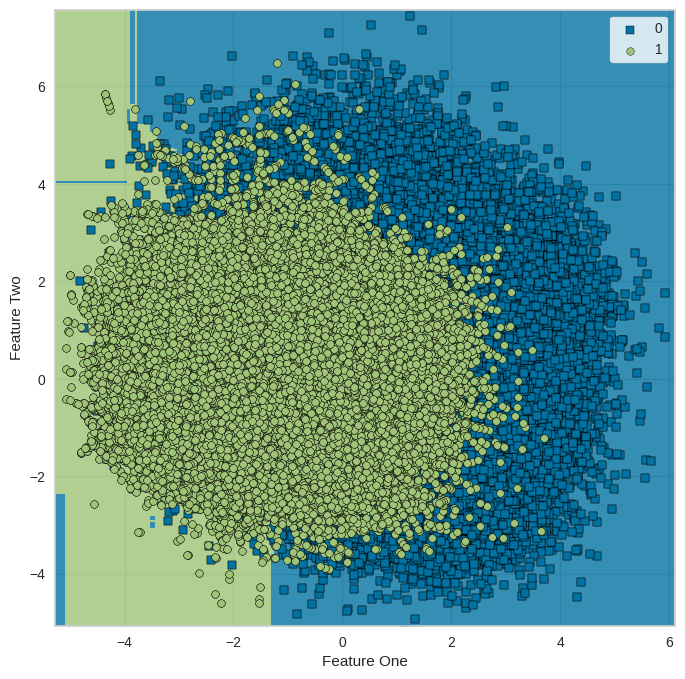

In [ ]:
fraud_detector.plot_GBM('boundary')

In [ ]:
fraud_detector.evaluate(prediction, 'GBM after Preprocessing')

TPR:  97.78999999999999% 
FPR:  1.39% 
Threshold:  1


>> #### 2.1.2) With Hyperparameter Tunning

In [ ]:
prediction = fraud_detector.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9764,0.9953,0.9843,0.9691,0.9766,0.9529,0.9530
1,0.9743,0.9951,0.9828,0.9665,0.9746,0.9487,0.9488
2,0.9731,0.9952,0.9814,0.9653,0.9733,0.9461,0.9463
3,0.9736,0.9956,0.9820,0.9658,0.9739,0.9473,0.9474
4,0.9744,0.9953,0.9822,0.9671,0.9746,0.9488,0.9489
5,0.9736,0.9954,0.9825,0.9652,0.9738,0.9471,0.9473
6,0.9736,0.9950,0.9807,0.9669,0.9738,0.9472,0.9473
7,0.9746,0.9951,0.9827,0.9671,0.9748,0.9493,0.9494
8,0.9745,0.9956,0.9822,0.9673,0.9747,0.9491,0.9492


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

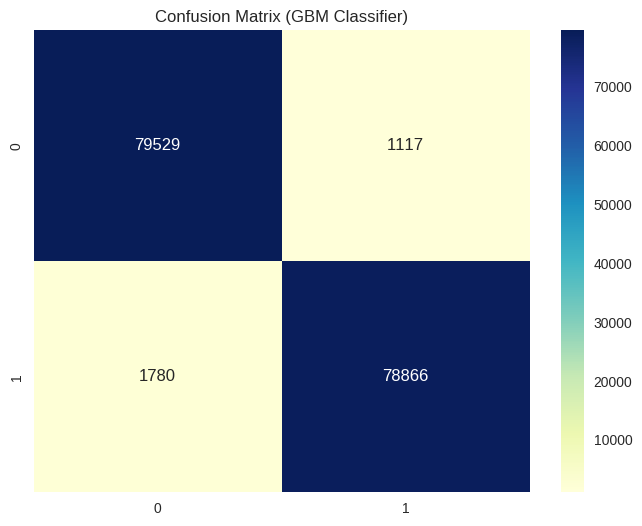

In [ ]:
fraud_detector.plot_GBM()

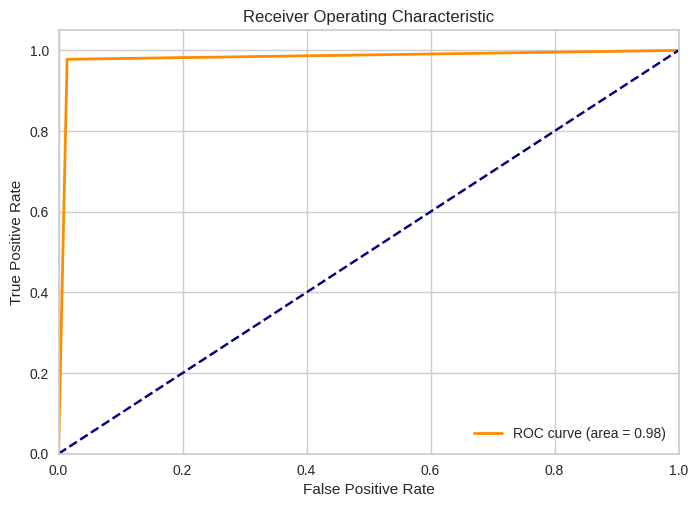

AUC: 0.9820


In [ ]:
fraud_detector.evaluate(prediction, 'Tuned GBM after Preprocessing')

> ### **2.2) Ada Boost**

>> #### 2.2.1)Without tunning

In [ ]:
prediction = fraud_detector.train_GBM('ada') # gradient boosting machine

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,0.9969,0.9803,0.9782,0.9792,0.9584,0.9584
1,0.9764,0.9967,0.9797,0.9733,0.9765,0.9528,0.9528
2,0.9765,0.9968,0.9796,0.9737,0.9766,0.9531,0.9531
3,0.9773,0.9968,0.9806,0.9742,0.9774,0.9546,0.9546
4,0.9781,0.9972,0.9811,0.9752,0.9781,0.9561,0.9561
5,0.9784,0.9972,0.9805,0.9765,0.9785,0.9569,0.9569
6,0.9766,0.9965,0.9784,0.9749,0.9767,0.9532,0.9532
7,0.9766,0.9966,0.9793,0.9741,0.9767,0.9532,0.9532
8,0.9761,0.9966,0.9776,0.9747,0.9761,0.9522,0.9522


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

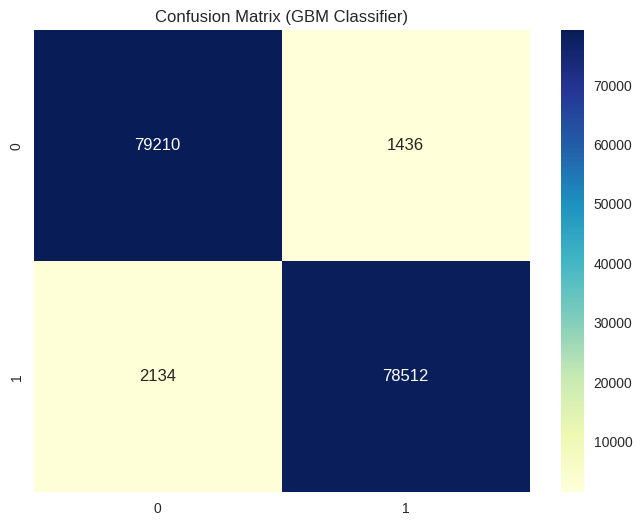

In [ ]:
fraud_detector.plot_GBM()

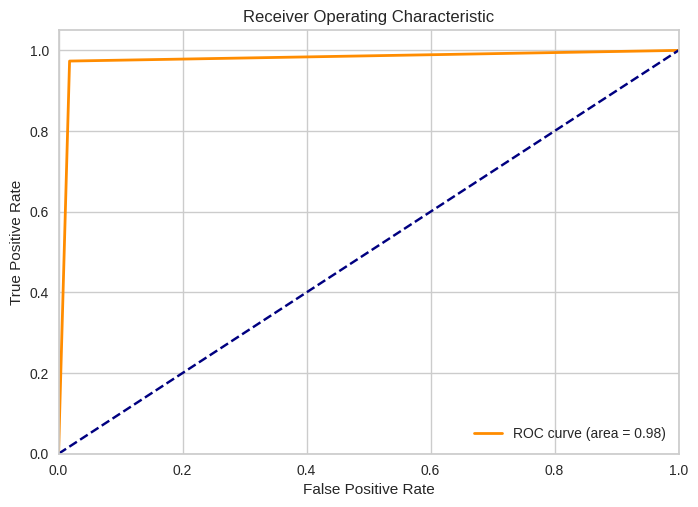

AUC: 0.9779


In [ ]:
fraud_detector.evaluate(prediction, 'Adaboost after Preprocessing')

>> #### 2.2.2)With Hyperparameter Tunning

In [ ]:
prediction = fraud_detector.tune_GBM('ada') # gradient boosting machine

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9759,0.9966,0.9771,0.9747,0.9759,0.9517,0.9517
1,0.9758,0.9971,0.9806,0.9713,0.9759,0.9516,0.9517
2,0.9794,0.9969,0.9813,0.9775,0.9794,0.9587,0.9587
3,0.9772,0.9967,0.9781,0.9764,0.9772,0.9545,0.9545
4,0.9772,0.9968,0.9793,0.9752,0.9773,0.9544,0.9544
5,0.9785,0.9970,0.9805,0.9767,0.9786,0.9571,0.9571
6,0.9775,0.9969,0.9802,0.9749,0.9775,0.9549,0.9550
7,0.9772,0.9966,0.9794,0.9750,0.9772,0.9544,0.9544
8,0.9781,0.9969,0.9804,0.9759,0.9781,0.9562,0.9562


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

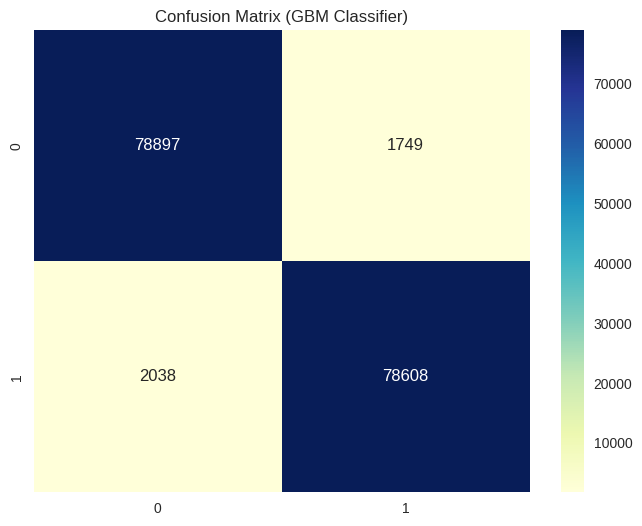

In [ ]:
fraud_detector.plot_GBM()

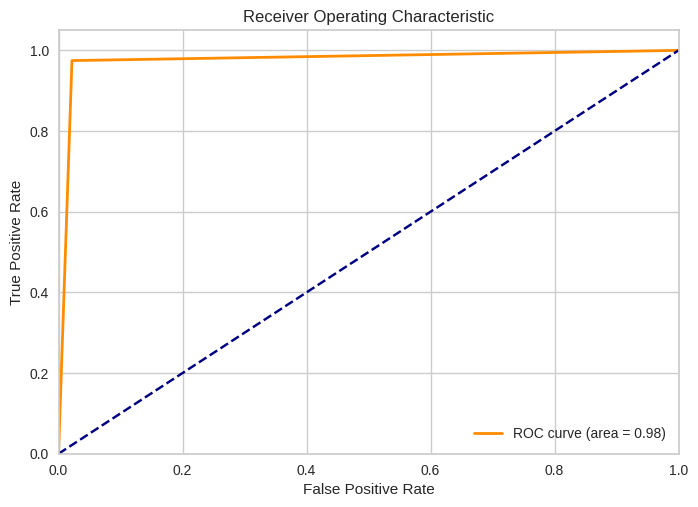

AUC: 0.9765


In [ ]:
fraud_detector.evaluate(prediction, 'Tuned Adaboost after Preprocessing')

_________
_____
_____

# **Step (4)**

#### Applying final approach on all the five dataset variances.

### **Variant 1**

In [ ]:
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Variant I')
fraud_detector.preprocess(option='option2', fet_eng=False)

In [ ]:
prediction = fraud_detector.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9924,0.9984,0.9881,0.9967,0.9924,0.9848,0.9848
1,0.9918,0.9980,0.9876,0.9960,0.9918,0.9837,0.9837
2,0.9927,0.9985,0.9888,0.9966,0.9927,0.9854,0.9855
3,0.9921,0.9979,0.9878,0.9963,0.9920,0.9841,0.9841
4,0.9926,0.9983,0.9882,0.9970,0.9926,0.9852,0.9853
5,0.9922,0.9982,0.9879,0.9965,0.9922,0.9844,0.9845
6,0.9930,0.9986,0.9895,0.9964,0.9929,0.9859,0.9859
7,0.9928,0.9983,0.9881,0.9975,0.9927,0.9856,0.9856
8,0.9923,0.9982,0.9871,0.9976,0.9923,0.9847,0.9848


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

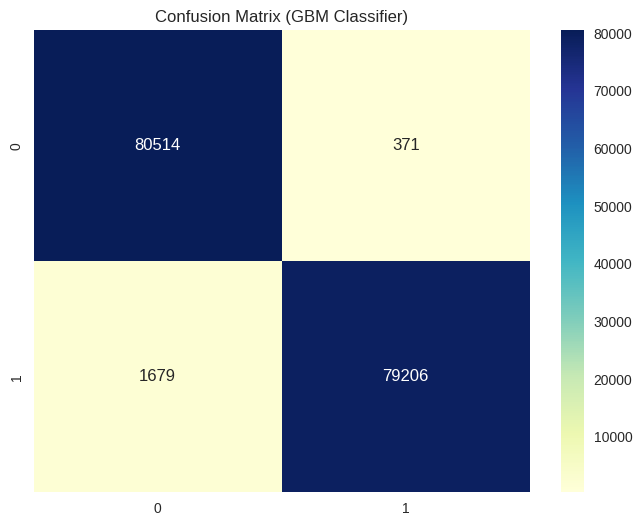

In [ ]:
fraud_detector.plot_GBM()

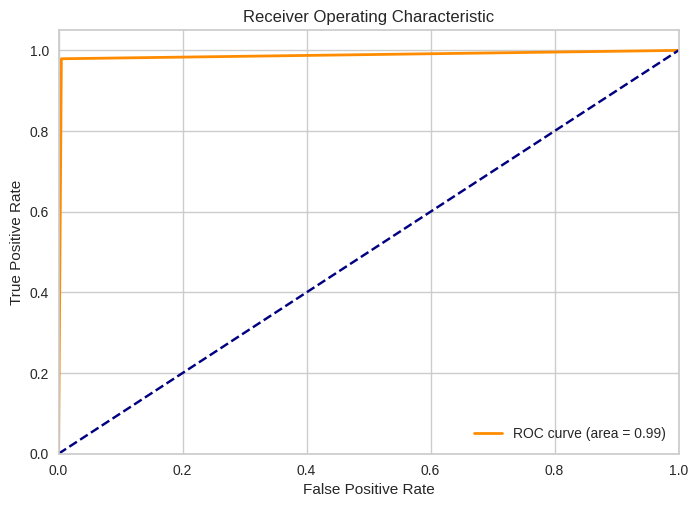

AUC: 0.9873


In [ ]:
fraud_detector.evaluate(prediction, 'Tuned GBM after Preprocessing (Variant I)')

### **Variant 2**

In [ ]:
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Variant II')
fraud_detector.preprocess(option='option2', fet_eng=False)

In [ ]:
prediction = fraud_detector.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9940,0.9987,0.9902,0.9977,0.9940,0.9880,0.9880
1,0.9935,0.9985,0.9894,0.9976,0.9935,0.9870,0.9870
2,0.9933,0.9987,0.9894,0.9971,0.9932,0.9865,0.9865
3,0.9931,0.9986,0.9891,0.9972,0.9931,0.9863,0.9863
4,0.9934,0.9986,0.9891,0.9977,0.9934,0.9868,0.9869
5,0.9943,0.9989,0.9907,0.9979,0.9943,0.9886,0.9887
6,0.9933,0.9986,0.9893,0.9973,0.9933,0.9866,0.9866
7,0.9939,0.9989,0.9901,0.9978,0.9939,0.9879,0.9879
8,0.9938,0.9987,0.9896,0.9981,0.9938,0.9876,0.9877


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

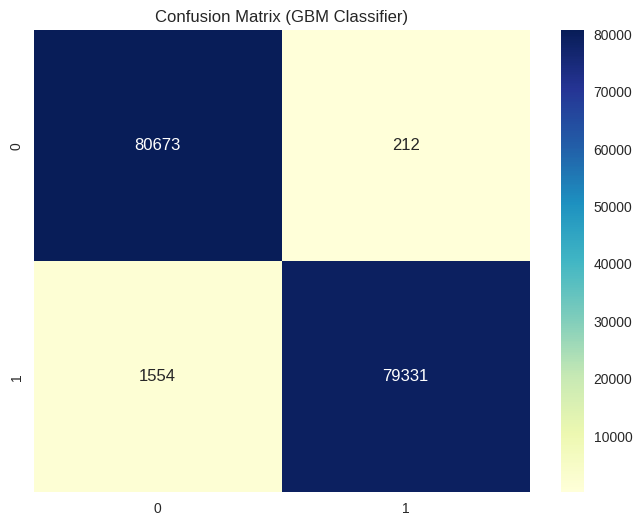

In [ ]:
fraud_detector.plot_GBM()

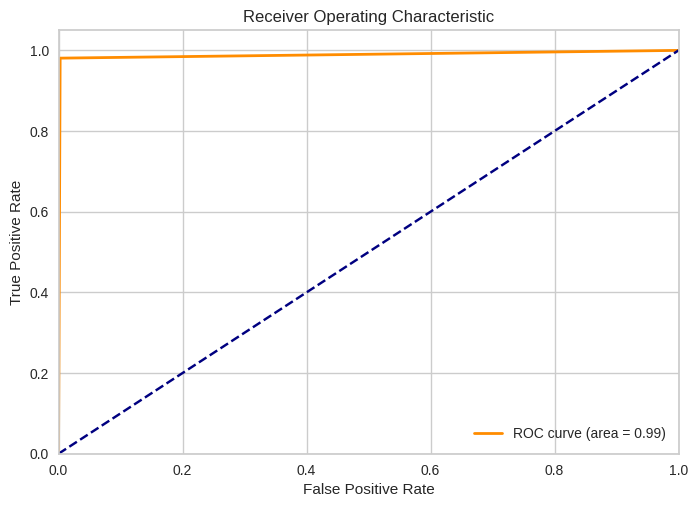

AUC: 0.9891


In [ ]:
fraud_detector.evaluate(prediction, 'Tuned GBM after Preprocessing (Variant II)')

### **Variant 3**

In [ ]:
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Variant III')
fraud_detector.preprocess(option='option2', fet_eng=False)

In [ ]:
prediction = fraud_detector.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9935,0.9984,0.9894,0.9975,0.9934,0.9869,0.9870
1,0.9930,0.9981,0.9896,0.9965,0.9930,0.9861,0.9861
2,0.9930,0.9986,0.9893,0.9967,0.9930,0.9860,0.9860
3,0.9932,0.9984,0.9891,0.9973,0.9932,0.9864,0.9865
4,0.9934,0.9985,0.9900,0.9968,0.9933,0.9867,0.9868
5,0.9930,0.9986,0.9888,0.9972,0.9930,0.9860,0.9860
6,0.9931,0.9987,0.9891,0.9970,0.9930,0.9861,0.9862
7,0.9932,0.9988,0.9901,0.9963,0.9932,0.9865,0.9865
8,0.9930,0.9985,0.9894,0.9965,0.9930,0.9860,0.9860


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

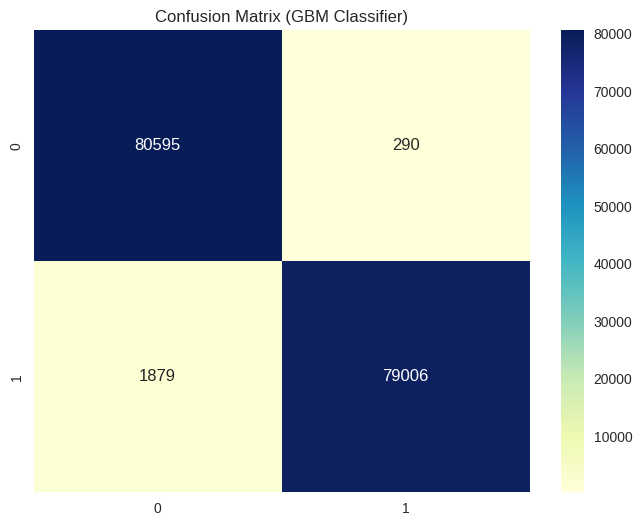

In [ ]:
fraud_detector.plot_GBM()

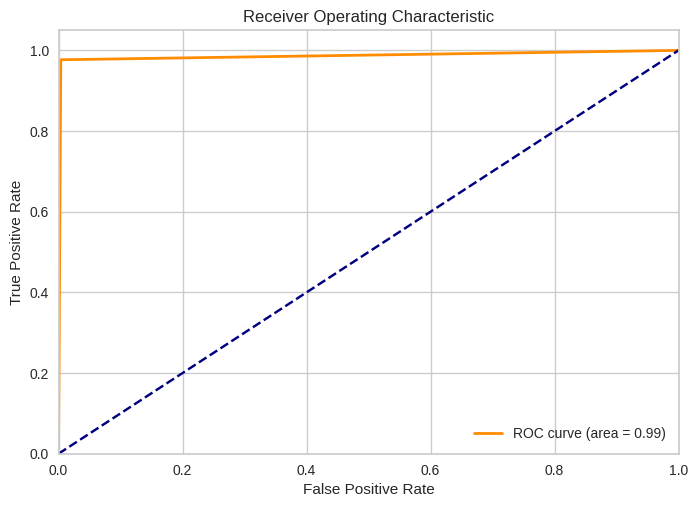

AUC: 0.9866


In [ ]:
fraud_detector.evaluate(prediction, 'Tuned GBM after Preprocessing (Variant III)')

### **Variant 4**

In [ ]:
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Variant IV')
fraud_detector.preprocess(option='option2', fet_eng=False)

In [ ]:
prediction = fraud_detector.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9929,0.9989,0.9898,0.9960,0.9929,0.9858,0.9859
1,0.9923,0.9987,0.9888,0.9958,0.9923,0.9846,0.9847
2,0.9922,0.9989,0.9886,0.9958,0.9922,0.9844,0.9844
3,0.9928,0.9989,0.9896,0.9959,0.9928,0.9855,0.9856
4,0.9932,0.9989,0.9899,0.9965,0.9932,0.9865,0.9865
5,0.9929,0.9989,0.9899,0.9959,0.9929,0.9858,0.9859
6,0.9934,0.9988,0.9899,0.9968,0.9934,0.9868,0.9868
7,0.9925,0.9989,0.9897,0.9953,0.9925,0.9850,0.9850
8,0.9933,0.9989,0.9897,0.9969,0.9933,0.9866,0.9866


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

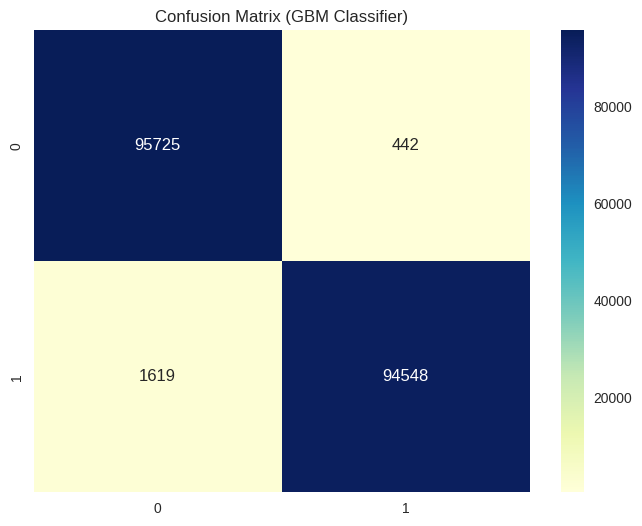

In [ ]:
fraud_detector.plot_GBM()

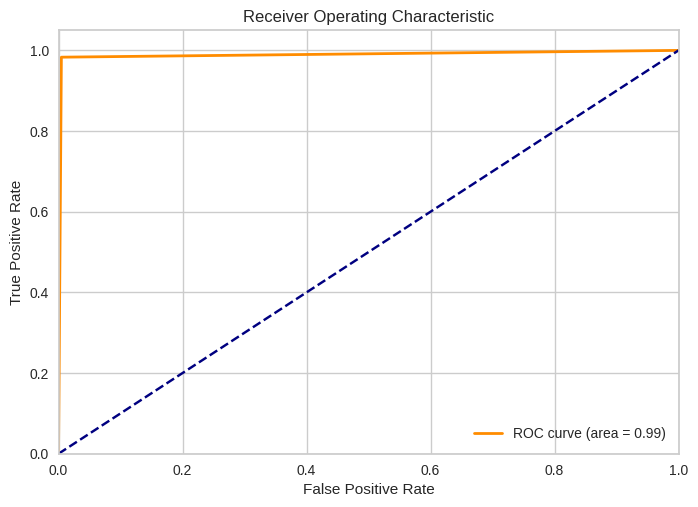

AUC: 0.9893


In [ ]:
fraud_detector.evaluate(prediction, 'Tuned GBM after Preprocessing (Variant IV)')

### **Variant 5**

In [ ]:
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Variant V')
fraud_detector.preprocess(option='option2', fet_eng=False)

In [ ]:
prediction = fraud_detector.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9954,0.9996,0.9940,0.9968,0.9954,0.9908,0.9908
1,0.9953,0.9995,0.9933,0.9972,0.9952,0.9905,0.9905
2,0.9951,0.9994,0.9930,0.9971,0.9951,0.9902,0.9902
3,0.9949,0.9995,0.9930,0.9969,0.9949,0.9899,0.9899
4,0.9947,0.9995,0.9936,0.9958,0.9947,0.9894,0.9894
5,0.9950,0.9995,0.9929,0.9971,0.9950,0.9900,0.9900
6,0.9954,0.9995,0.9935,0.9974,0.9954,0.9909,0.9909
7,0.9952,0.9995,0.9932,0.9972,0.9952,0.9904,0.9904
8,0.9944,0.9994,0.9928,0.9961,0.9944,0.9889,0.9889


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

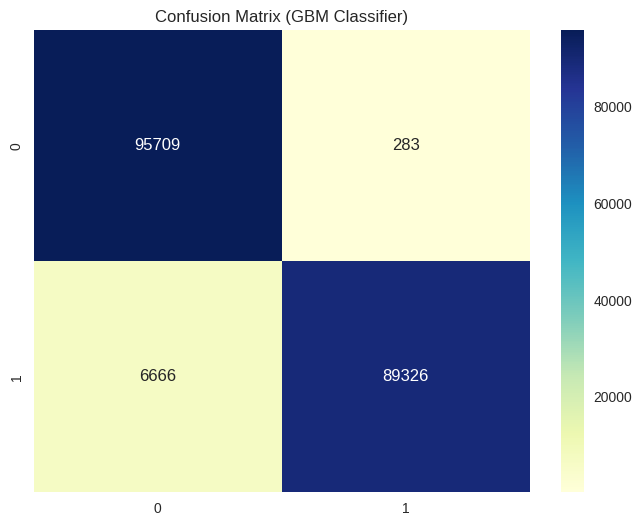

In [ ]:
fraud_detector.plot_GBM()

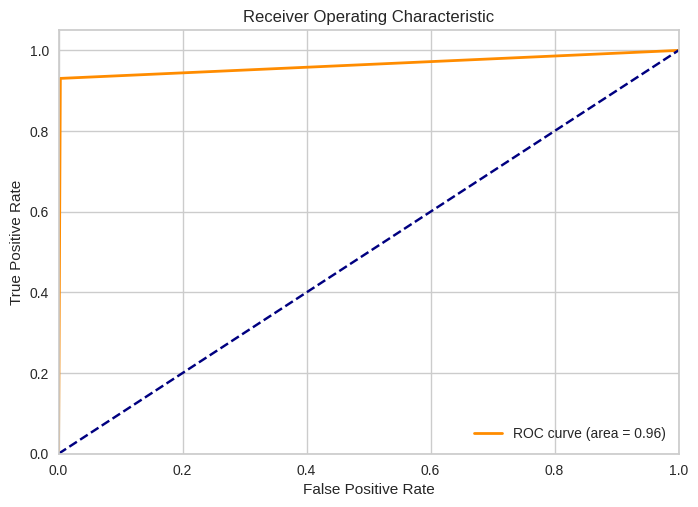

AUC: 0.9638


In [ ]:
fraud_detector.evaluate(prediction, 'Tuned GBM after Preprocessing (Variant IV)')

## **Interpreting the results**

* First concerning the fairness, we can observe how the results are fluctuating, and this is resulted from the baised nature of the data, where each dataset has distinct controlled types of bias that affected the predictive equality heavily.
* we can also observe that nearly all the variants resulted in AUC that ranges about 0.98.
* Othe rmetrics also showed some sort of stability concerning their values, such as accuracy , which also ranges about 0.98 across most of the variants.
* There are slight changes in the FP and TP values

# **<a>Refrences.</a>**

There are a lot of resources, but these are among the most important sources that helped us and we learned from them.

> [Resample Dataset](https://stackoverflow.com/questions/52735334/python-pandas-resample-dataset-to-have-balanced-classes)

> [train test split kfold vs stratifiedkfold](https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869)

> [Handeling Dataset](https://www.kaggle.com/code/juanjosmorenogiraldo/bank-fraud-detection-using-gbm/notebook#3-%7C-Data-Preprocessing)

> [Fairness Understanding](https://arxiv.org/abs/1802.04422)

> [Fairness Evaluation](https://www.kaggle.com/code/sgpjesus/boilerplate-evaluation/notebook)

> [Fairness In Fraud Detection](https://arxiv.org/abs/2207.06273)
